In [1]:
import pandas as pd

### Load and process sensor readings

In [2]:
sensor_readings = pd.read_csv("speed_readings.csv")
sensor_readings = sensor_readings.pivot(index="Timestamp", columns="sensor_id", values="measurement")
sensor_readings

sensor_id,716328,716331,716337,716339,716554,716571,716939,716941,716942,716943,...,773953,773954,773974,773975,773995,773996,774011,774012,774067,774204
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,66.875000,67.500000,63.125000,64.250000,63.500000,67.000000,53.625000,58.125000,62.125000,55.000,...,55.750000,63.875000,52.125000,64.750000,63.125000,61.375000,67.750000,55.875000,52.500000,64.500000
2012-03-01 00:05:00,67.444444,65.444444,63.777778,66.444444,56.000000,65.888889,59.888889,56.222222,62.000000,50.000,...,60.888889,62.333333,52.333333,62.222222,58.555556,58.666667,64.111111,66.444444,34.666667,66.666667
2012-03-01 00:10:00,65.000000,67.875000,63.875000,64.750000,59.125000,61.375000,56.000000,59.125000,63.125000,54.875,...,62.375000,61.500000,56.125000,63.500000,64.125000,59.500000,67.125000,65.750000,50.000000,56.500000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,66.333333,64.333333,65.777778,63.444444,59.888889,59.555556,53.444444,60.333333,57.000000,53.000,...,62.666667,62.555556,54.777778,64.888889,58.222222,60.444444,66.666667,64.888889,61.777778,65.111111
2012-06-27 23:40:00,63.750000,64.250000,66.125000,63.125000,55.750000,66.750000,56.500000,59.125000,58.125000,51.625,...,62.500000,62.875000,52.500000,63.500000,65.250000,65.125000,65.750000,67.875000,62.625000,60.125000
2012-06-27 23:45:00,66.888889,59.000000,64.444444,64.444444,55.333333,68.333333,52.222222,61.333333,65.333333,55.000,...,59.888889,63.333333,53.222222,64.333333,65.555556,62.888889,67.444444,67.888889,60.333333,64.333333


## Imputation

### Split train/val, and scale

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

In [ ]:
speeds_c0 = sensor_readings[[716328, 716331, 716337, 716339, 716571, 716939, 716941, 716942, 716943, 716949, 716951, 716953, 716955, 716956, 716958, 716960, 717445, 717446, 717447, 717450, 717452, 717453, 717456, 717458, 717459, 717460, 717461, 717462, 717463, 717465, 717466, 717468, 717469, 717472, 717473, 717480, 717481, 717483, 717486, 717488, 717489, 717490, 717491, 717492, 717493, 717495, 717497, 717498, 717499, 717502, 717504, 717508, 717510, 717513, 717570, 717571, 717572, 717573, 717576, 717578, 717592, 717595, 717608, 717610, 717804, 717816, 717818, 717819, 717821, 717823, 717825, 718045, 718064, 718066, 718072, 718089, 718090, 718141, 718204, 718371, 718379, 718499, 737529]]
speeds_c1 =  sensor_readings[[769345, 769346, 769358, 769359, 769372, 769373, 769388, 769402, 769403, 769405, 769418, 769430, 769431, 769443, 769444, 769467, 771667, 771673, 772140, 772151, 772167, 772168, 772178, 772513, 772596, 772597, 772669, 773012, 773013, 773023, 773024, 773062, 773869, 773880, 773904, 773906, 773916, 773927, 773939, 773953, 773954, 773974, 773975, 773995, 773996, 774011, 774012, 774067]]
speeds_c2 = sensor_readings[[759591, 759602, 760024, 760650, 761003, 761599, 761604, 762329, 763995, 764101, 764106, 764120, 764424, 764760, 764766, 764781, 764794, 764853, 764858, 764949, 765099, 765164, 765171, 765176, 765182, 765265, 765273, 765604, 767053, 767350, 767351, 767366, 767454, 767455, 767494, 767495, 767509, 767523, 767541, 767542, 767554, 767572, 767573, 767620, 767621, 767750, 767751, 768066, 768469]]
speeds_all = sensor_readings.copy()[:150]

# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [speeds_c0, speeds_c1, speeds_c2, speeds_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "speed", i)

In [5]:
X_train_full_scaled[1]

sensor_id,769345,769346,769358,769359,769372,769373,769388,769402,769403,769405,...,773939,773953,773954,773974,773975,773995,773996,774011,774012,774067
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,0.686119,0.552111,0.720071,0.509519,0.332267,0.476704,0.333409,0.417810,0.374391,0.759628,...,0.571499,0.027902,0.442671,-0.068183,0.269287,0.279438,0.265665,0.353572,-0.332757,-0.152326
2012-03-01 00:05:00,0.820647,0.701854,0.702033,0.792156,0.552466,0.525629,0.484914,0.659686,0.289010,0.561899,...,0.810589,0.339414,0.342273,-0.052679,0.105760,0.004178,0.098432,0.142309,0.273987,-1.073832
2012-03-01 00:10:00,0.800468,0.737999,0.734188,0.461001,0.508426,0.482820,0.511263,0.592264,0.483131,0.811023,...,0.340948,0.429500,0.288004,0.229505,0.188422,0.339677,0.149888,0.317287,0.234122,-0.281509
2012-03-01 00:15:00,-2.838507,-2.880178,-2.886868,-2.824367,-2.964422,-2.550522,-3.098513,-3.351912,-3.525756,-2.047833,...,-2.239028,-3.351575,-3.717078,-3.947432,-3.919539,-3.523162,-3.524103,-3.579790,-3.540285,-2.865170
2012-03-01 00:20:00,-2.838507,-2.880178,-2.886868,-2.824367,-2.964422,-2.550522,-3.098513,-3.351912,-3.525756,-2.047833,...,-2.239028,-3.351575,-3.717078,-3.947432,-3.919539,-3.523162,-3.524103,-3.579790,-3.540285,-2.865170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-04 04:20:00,0.322894,0.492361,0.310673,0.599624,0.300810,0.599016,0.419043,0.561924,0.367142,0.605442,...,-0.169558,0.520427,-0.062034,0.843487,0.139903,0.445095,0.010956,-0.023798,-0.124662,-0.442988
2012-06-04 04:25:00,0.288515,0.471707,0.388317,0.311596,0.318286,0.586106,0.402941,0.234929,0.192352,0.641847,...,0.098199,0.366355,-0.272780,0.311162,-0.181762,0.211668,-0.025064,0.045548,0.089014,-0.011660
2012-06-04 04:30:00,0.242178,0.339668,0.190677,0.336240,0.458095,0.592901,0.274125,0.304036,0.280150,0.631140,...,-0.087218,0.399190,0.003089,0.248110,0.059037,0.286967,0.327413,0.222944,0.155190,-0.920965


### Introduce MCAR Missingness

In [6]:
from pygrinder import mar_logistic

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}

for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mar_logistic(X_train_full_scaled[cluster_id].values, obs_rate=0.6, missing_rate=rate)
        X_val_incomplete[cluster_id][key] = mar_logistic(X_val_full_scaled[cluster_id].values, obs_rate=0.6, missing_rate=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90


### MICE Imputation

In [12]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit on train with missing values
imputer.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

# Transform test data with missing values
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
imputed = imputer.transform(X_test)

# the model learns that the second feature is double the first
print(np.round(imputer.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [13]:
X_test

[[nan, 2], [6, nan], [nan, 6]]

In [ ]:
# Dictionary to hold results
mice_imputed_results = {}

for cluster_id in range(len(clusters)):
    mice_imputed_results[cluster_id] = {}

    for rate in missing_rates:
        print(f"Imputing cluster {cluster_id} with missing rate {rate*100}%")
        key = int(rate * 100)
        imputer = IterativeImputer(max_iter=10, random_state=0, verbose=1)

        # Fit on training data with missing values
        imputer.fit(X_train_incomplete[cluster_id][key])
        
        # Impute using mice
        X_imputed = imputer.transform(X_val_incomplete[cluster_id][key])
        mice_imputed_results[cluster_id][key] = X_imputed

Imputing cluster 0 with missing rate 5.0%
[IterativeImputer] Completing matrix with shape (27417, 83)


[IterativeImputer] Change: 32.217830657958984, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 2.2789032459259033, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.6507776975631714, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.3975783586502075, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.2479386329650879, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.1548163890838623, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.09672045707702637, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.06042909622192383, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.03778183460235596, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.02360379695892334, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Completing matrix with shape (6855, 83)


d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 0 with missing rate 20.0%
[IterativeImputer] Completing matrix with shape (27417, 83)
[IterativeImputer] Change: 44.58148193359375, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 2.3007731437683105, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.6736449003219604, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.3387719392776489, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.17619913816452026, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.12408854067325592, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.08737632632255554, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.06167806312441826, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.04315571486949921, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.03043673187494278, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Com

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 0 with missing rate 60.0%
[IterativeImputer] Completing matrix with shape (27417, 83)
[IterativeImputer] Change: 65.69522094726562, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 13.596318244934082, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.09932228922843933, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.08310729265213013, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.07596880197525024, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.07635655999183655, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.09185546636581421, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.051500990986824036, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.07870501279830933, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.06432589888572693, scaled tolerance: 0.003964366674423218 
[IterativeImputer] 

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 0 with missing rate 90.0%
[IterativeImputer] Completing matrix with shape (27417, 83)
[IterativeImputer] Change: 47.239288330078125, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 1.8341236114501953, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 0.4143272340297699, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 2.467806100845337, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 4.219074249267578, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 7.5660881996154785, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 18.574628829956055, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 5.681336402893066, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 7.067566871643066, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Change: 25.308053970336914, scaled tolerance: 0.003964366674423218 
[IterativeImputer] Completing m

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 1 with missing rate 5.0%
[IterativeImputer] Completing matrix with shape (27417, 48)
[IterativeImputer] Change: 23.777042388916016, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 1.4800596237182617, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.43312931060791016, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.16486085951328278, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.14651918411254883, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.12975464761257172, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.11504210531711578, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.10208266228437424, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.09048518538475037, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.08020967990159988, scaled tolerance: 0.004581202507019043 
[IterativeImputer] C

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 36.82538604736328, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 3.6772122383117676, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.7670637369155884, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.4258785545825958, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.27068030834198, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.17209243774414062, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.10969597101211548, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.0698760375380516, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.04461165517568588, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.028500791639089584, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Completing matrix with shape (6855, 48)
Imputing cluster 1 with missing rate 60.0%
[IterativeImputer] Complet

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 45.692413330078125, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 10.329784393310547, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 1.931609869003296, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.019164234399795532, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.028147369623184204, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.026207998394966125, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.028004825115203857, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.02150818705558777, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.022935152053833008, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Change: 0.028844445943832397, scaled tolerance: 0.004581202507019043 
[IterativeImputer] Completing matrix with shape (6855, 48)


d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 1 with missing rate 90.0%
[IterativeImputer] Completing matrix with shape (27417, 48)
[IterativeImputer] Change: 26.439706802368164, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.2071697860956192, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.01852002739906311, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.09747688472270966, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.06041254103183746, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.03658396005630493, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.04441656172275543, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.2685677409172058, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.21559879183769226, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Change: 0.26473546028137207, scaled tolerance: 0.00427340030670166 
[IterativeImputer] Completing 

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 2 with missing rate 5.0%
[IterativeImputer] Completing matrix with shape (27417, 49)
[IterativeImputer] Change: 27.690780639648438, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 1.7678675651550293, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.5926443338394165, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.4336049556732178, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.32546472549438477, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.24466872215270996, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.1839606761932373, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.1383066177368164, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.10398554801940918, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.07818222045898438, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Compl

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 23.651023864746094, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 3.4724783897399902, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.757775068283081, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.5414551496505737, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.42185401916503906, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.3336251974105835, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.26505565643310547, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.21094131469726562, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.16801118850708008, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.13379216194152832, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Completing matrix with shape (6855, 49)
Imputing cluster 2 with missing rate 60.0%
[IterativeImputer] Compl

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 48.416664123535156, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 11.53764820098877, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.8116422891616821, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.036470189690589905, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.05926251411437988, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.06426548957824707, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.05078968405723572, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.04924584925174713, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.05595044791698456, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 0.03200189769268036, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Completing matrix with shape (6855, 49)


d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 2 with missing rate 90.0%
[IterativeImputer] Completing matrix with shape (27417, 49)
[IterativeImputer] Change: 39.74089050292969, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 1.5578339099884033, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 2.736121892929077, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 8.931486129760742, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 4.807053565979004, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 18.929716110229492, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 16.14471435546875, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 43.909507751464844, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 1.4665806293487549, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Change: 1.3505573272705078, scaled tolerance: 0.004084764957427978 
[IterativeImputer] Completing ma

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputing cluster 3 with missing rate 5.0%
[IterativeImputer] Completing matrix with shape (120, 207)
[IterativeImputer] Change: 101.14034271240234, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 12.936473846435547, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 1.9369820356369019, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.2719729244709015, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.04282522201538086, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.009605824947357178, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.009401321411132812, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.002811133861541748, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (30, 207)
Imputing cluster 3 with missing rate 20.0%
[IterativeImputer] Completing matrix with 

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 171.29629516601562, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 30.216819763183594, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 3.586012363433838, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.6115670204162598, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.335290789604187, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.11499263346195221, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.03239518404006958, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.011519402265548706, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Change: 0.003988523036241531, scaled tolerance: 0.007542155265808106 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (30, 207)


In [15]:
mice_imputed_results[0][20]

array([[ 0.6297999 ,  1.0077834 ,  0.45711738, ...,  0.2363648 ,
        -0.10618   ,  0.52270913],
       [ 0.7002077 ,  1.1256403 ,  0.6278973 , ...,  0.6024125 ,
         0.08883367,  0.4512813 ],
       [ 0.6237153 ,  0.90910137,  0.6149594 , ...,  0.39405787,
         0.22658142,  0.18779196],
       ...,
       [ 0.6932539 , -1.7151463 ,  0.6632608 , ...,  0.24564086,
         0.36278144,  0.18144281],
       [ 0.5750383 ,  0.9907718 ,  0.5347446 , ...,  0.31984937,
         0.18634051,  0.24414058],
       [ 0.6723923 ,  1.0050079 ,  0.704662  , ...,  0.29130763,
         0.4432633 ,  0.3655679 ]], dtype=float32)

### Unscale data before evaluation

In [16]:
import joblib

mice_imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    mice_imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"speed_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        mice_imputed_unscaled[cluster_id][key] = scaler.inverse_transform(mice_imputed_results[cluster_id][key])

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


In [17]:
pd.DataFrame(X_val_incomplete[1][90])

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.477601,0.372862,0.353025,NaN,NaN,NaN,NaN,0.311621,0.345394,0.682535,...,-0.032325,NaN,0.247302,NaN,0.002432,NaN,0.173044,0.135858,-0.038554,0.474212
1,0.316168,0.611861,0.204794,NaN,NaN,NaN,NaN,0.508830,0.091667,0.637564,...,0.648350,NaN,0.174038,NaN,0.042864,-0.217536,0.157607,-0.054900,-0.022152,-0.262132
2,0.037397,0.288770,0.363220,NaN,NaN,NaN,NaN,0.551811,0.340561,0.607584,...,-0.175047,NaN,0.233734,-0.193254,-0.038001,NaN,0.160179,0.155211,0.089014,0.183550
3,0.383432,0.412695,0.183618,NaN,NaN,NaN,NaN,0.432980,0.294648,0.721082,...,0.335459,NaN,-1.022602,NaN,-0.013741,0.076130,0.126733,-0.226998,0.004500,-0.307346
4,0.527676,0.642842,0.463609,NaN,NaN,NaN,NaN,0.437194,0.256791,0.601873,...,0.420238,NaN,-0.222129,NaN,0.091384,NaN,0.208205,-0.147976,0.133663,-0.384855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.647256,0.560225,0.262831,NaN,0.508426,NaN,NaN,0.605749,0.334117,0.550478,...,0.620293,NaN,0.356745,NaN,0.278272,NaN,0.208205,0.290677,0.184690,0.327087
6851,0.726478,0.664972,0.790657,NaN,NaN,NaN,NaN,0.448150,0.396139,0.778901,...,0.725200,NaN,0.377548,NaN,0.188422,NaN,0.497219,0.237458,0.356109,0.370865
6852,0.701067,0.713657,0.771050,NaN,NaN,NaN,NaN,0.470905,0.340561,0.704664,...,0.605655,NaN,0.407396,NaN,0.242332,NaN,0.359144,0.335833,0.356906,0.252448
6853,0.746657,0.691527,0.762423,NaN,NaN,NaN,NaN,0.584679,0.338144,0.566896,...,0.620903,NaN,-0.241123,NaN,0.115643,NaN,0.049548,0.317287,0.133663,0.093122


In [18]:
pd.DataFrame(mice_imputed_results[1][90]).max

<bound method DataFrame.max of             0         1         2         3         4         5         6   \
0     0.477601  0.372862  0.353025  0.365324  0.184251  0.435667  0.545079   
1     0.316168  0.611861  0.204794  0.570315  0.248536  0.424482  0.518341   
2     0.037397  0.288770  0.363220  0.227892  0.245008  0.474635  0.746054   
3     0.383432  0.412695  0.183618  0.405272  0.202103  0.404279  0.351865   
4     0.527676  0.642842  0.463609  0.592908  0.261411  0.512965  0.705711   
...        ...       ...       ...       ...       ...       ...       ...   
6850  0.647256  0.560225  0.262831  0.458298  0.508426  0.349985 -0.352617   
6851  0.726478  0.664972  0.790657  0.668198  0.065492  0.357418  0.137969   
6852  0.701067  0.713657  0.771050  0.633137  0.017941  0.422578  0.014774   
6853  0.746657  0.691527  0.762423  0.578917  0.152858  0.433186  0.025081   
6854  0.707046  0.654645  0.720855  0.595317  0.121851  0.373814 -0.064736   

            7         8         

In [20]:
X_train_full_unscaled[1]

sensor_id,769345,769346,769358,769359,769372,769373,769388,769402,769403,769405,...,773939,773953,773954,773974,773975,773995,773996,774011,774012,774067
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,65.500000,64.625000,63.875000,60.125000,65.500000,61.875000,65.125000,62.125000,67.250000,54.625000,...,64.000000,55.750000,63.875000,52.125000,64.750000,63.125000,61.375000,67.750000,55.875000,52.500000
2012-03-01 00:05:00,68.000000,67.444444,63.555556,65.222222,69.875000,62.875000,68.000000,66.111111,65.777778,50.777778,...,69.444444,60.888889,62.333333,52.333333,62.222222,58.555556,58.666667,64.111111,66.444444,34.666667
2012-03-01 00:10:00,67.625000,68.125000,64.125000,59.250000,69.000000,62.000000,68.500000,65.000000,69.125000,55.625000,...,58.750000,62.375000,61.500000,56.125000,63.500000,64.125000,59.500000,67.125000,65.750000,50.000000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-04 04:20:00,58.750000,63.500000,56.625000,61.750000,64.875000,64.375000,66.750000,64.500000,67.125000,51.625000,...,47.125000,63.875000,56.125000,64.375000,62.750000,65.875000,57.250000,61.250000,59.500000,46.875000
2012-06-04 04:25:00,58.111111,63.111111,58.000000,56.555556,65.222222,64.111111,66.444444,59.111111,64.111111,52.333333,...,53.222222,61.333333,52.888889,57.222222,57.777778,62.000000,56.666667,62.444444,63.222222,55.222222
2012-06-04 04:30:00,57.250000,60.625000,54.500000,57.000000,68.000000,64.250000,64.000000,60.250000,65.625000,52.125000,...,49.000000,61.875000,57.125000,56.375000,61.500000,63.250000,62.375000,65.500000,64.375000,37.625000


## Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id]
        mask = val_masks[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.values.shape[1]):  # loop over features
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original.values[:, f][f_mask]
            y_pred = imputed[:, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.722
R² Cluster 0 Rate 20%: 0.613
R² Cluster 0 Rate 60%: 0.373
R² Cluster 0 Rate 90%: -9.042
R² Cluster 1 Rate 5%: 0.809
R² Cluster 1 Rate 20%: 0.699
R² Cluster 1 Rate 60%: 0.068
R² Cluster 1 Rate 90%: 0.087
R² Cluster 2 Rate 5%: 0.781
R² Cluster 2 Rate 20%: 0.763
R² Cluster 2 Rate 60%: 0.317
R² Cluster 2 Rate 90%: -39.680
R² Cluster 3 Rate 5%: -136.070
R² Cluster 3 Rate 20%: -103.898
R² Cluster 3 Rate 60%: -37.269
R² Cluster 3 Rate 90%: -37.368


In [23]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id].values
        mask = val_masks[cluster_id][key]

        # Initialize per-feature smape list
        feature_smapes = []
        for f in range(original.shape[1]):
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            F = imputed[:, f][f_mask]
            A = original[:, f][f_mask]

            num = np.abs(F - A)
            denom = np.abs(F) + np.abs(A) + 1e-8
            smape_f = np.mean(2 * num / denom) * 100
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 59.87%
SMAPE Cluster 0 Rate 20.0%: 44.62%
SMAPE Cluster 0 Rate 60.0%: 40.16%
SMAPE Cluster 0 Rate 90.0%: 47.50%
SMAPE Cluster 1 Rate 5.0%: 61.27%
SMAPE Cluster 1 Rate 20.0%: 38.95%
SMAPE Cluster 1 Rate 60.0%: 39.85%
SMAPE Cluster 1 Rate 90.0%: 42.46%
SMAPE Cluster 2 Rate 5.0%: 48.02%
SMAPE Cluster 2 Rate 20.0%: 36.78%
SMAPE Cluster 2 Rate 60.0%: 30.81%
SMAPE Cluster 2 Rate 90.0%: 34.38%
SMAPE Cluster 3 Rate 5.0%: 22.48%
SMAPE Cluster 3 Rate 20.0%: 21.31%
SMAPE Cluster 3 Rate 60.0%: 20.28%
SMAPE Cluster 3 Rate 90.0%: 24.79%


### Average errors per cluster

In [24]:
features_per_cluster = {i: X_val_full_unscaled[i].shape[-1] for i in range(len(clusters))}

In [25]:
features_per_cluster

{0: 83, 1: 48, 2: 49, 3: 207}

In [26]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average NRMSE for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"NRMSE for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average NRMSE for rate 5.0%: 0.76%
NRMSE for full at rate 5.0%: -136.07%
Weighted Average NRMSE for rate 20.0%: 0.68%
NRMSE for full at rate 20.0%: -103.90%
Weighted Average NRMSE for rate 60.0%: 0.28%
NRMSE for full at rate 60.0%: -37.27%
Weighted Average NRMSE for rate 90.0%: -14.95%
NRMSE for full at rate 90.0%: -37.37%


In [27]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 57.02%
SMAPE for full at rate 5.0%: 22.48%
Weighted Average SMAPE for rate 20.0%: 40.98%
SMAPE for full at rate 20.0%: 21.31%
Weighted Average SMAPE for rate 60.0%: 37.53%
SMAPE for full at rate 60.0%: 20.28%
Weighted Average SMAPE for rate 90.0%: 42.58%
SMAPE for full at rate 90.0%: 24.79%


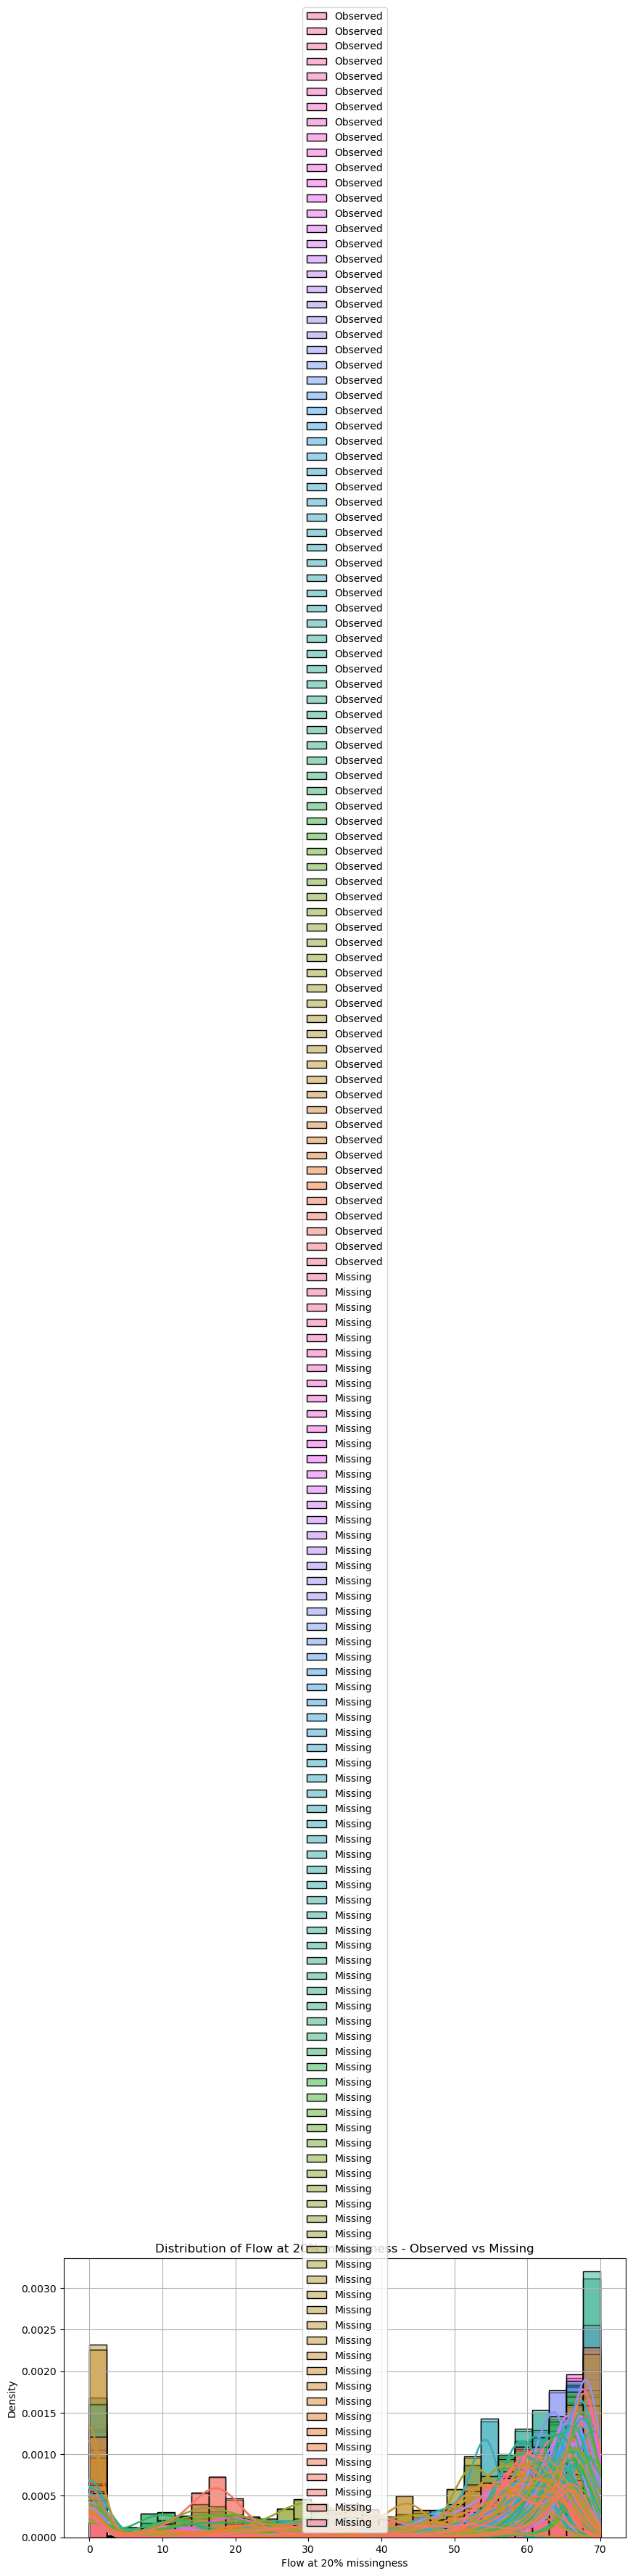

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled[0], val_masks[0][90], feature_name="Flow at 20% missingness")

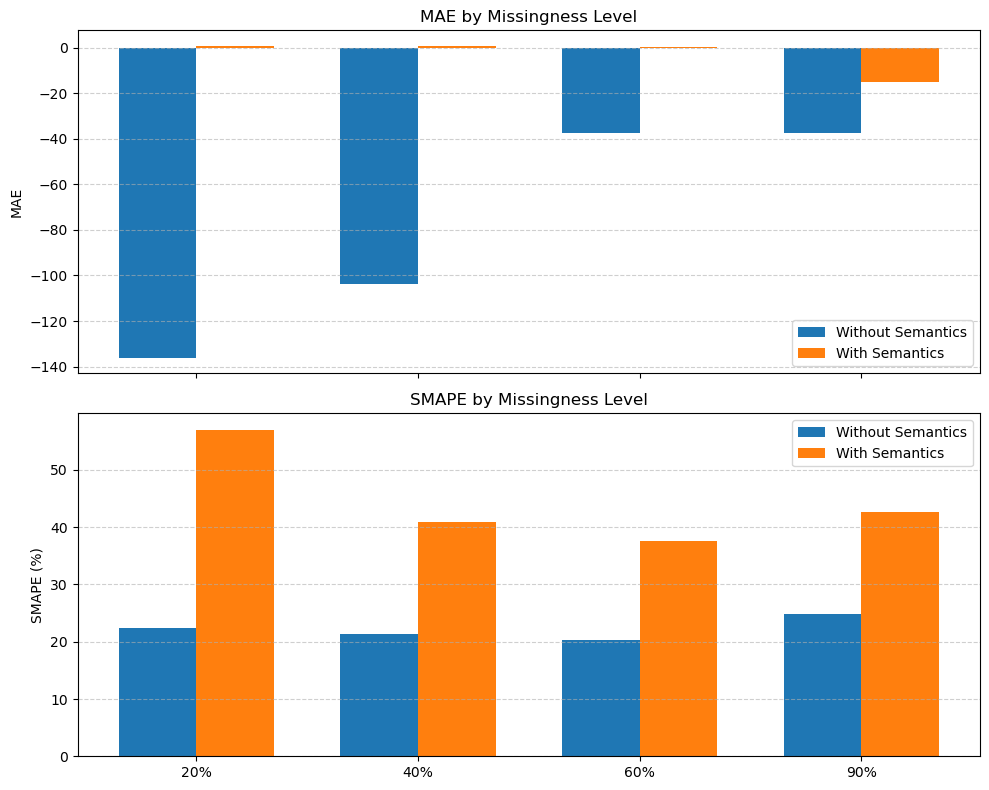

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Missingness levels
missing_levels = ['5%', '20%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
